# **Employee Attrition Prediction**

In [6]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings

# to ignore all future warnings
warnings.simplefilter(action  ='ignore', category = FutureWarning)

In [9]:
pd.options.mode.copy_on_write = True

In [33]:
data= pd.read_csv('/content/Employee.csv')#to load dataset

**Data Understanding**

In [ ]:
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

From data information we have 16 categorical columns and 7 numerical columns excluding employee ID

In [34]:
data = data.drop(columns=['Employee ID']) #to drop employee Id column

In [12]:
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3.0,No,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1.0,No,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


Dependent variable or target column is Attrition

independent variables can be further classified as
Demographics--Age, Gender
Job Details-- Job Role, Years at Company, Monthly Income, Job Level, etc
Performance Metrics-- Performance Rating, Number of Promotions.
Work Environment--Work-Life Balance, Job Satisfaction, Remote Work.
Opportunities-- Leadership Opportunities, Innovation Opportunities.
Company Metrics-- Company Size, Company Tenure, Company Reputation, Employee Recognition

**Explanatory data analysis**

In [ ]:
data.describe()#stastical summary for numerical cols

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [ ]:
data.describe(include=['object'])#stastical summary for categorical  cols

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74498,74498,74494,74498,74494,74498,74493,74494,74493,74496,74495,74498,74498,74498,74496,74498
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Entry,Medium,No,No,No,Good,Low,Stayed
freq,40826,19322,28157,37245,44716,50157,22331,37417,29778,37230,60297,70845,62394,37182,29619,39128


**Target column analysis-Attrition**

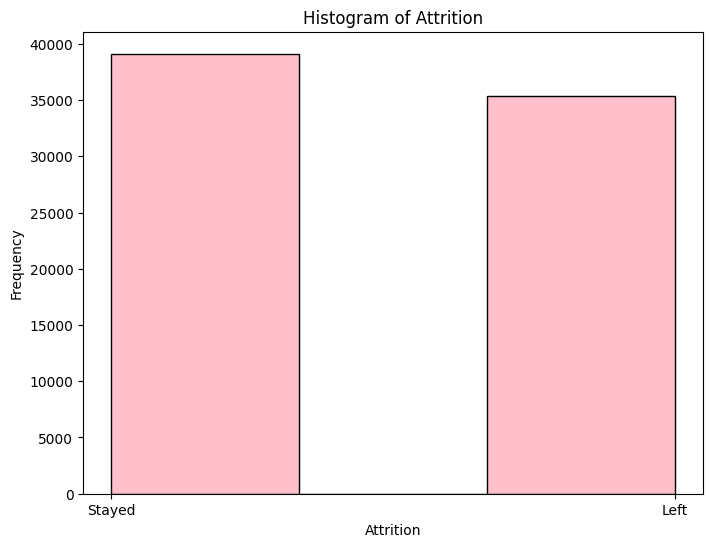

In [ ]:
plt.figure(figsize=(8, 6))#to plot histogram for target column
plt.hist(data['Attrition'], bins=3, color='pink', edgecolor='black')
plt.title('Histogram of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

**Other Cols Analysis**

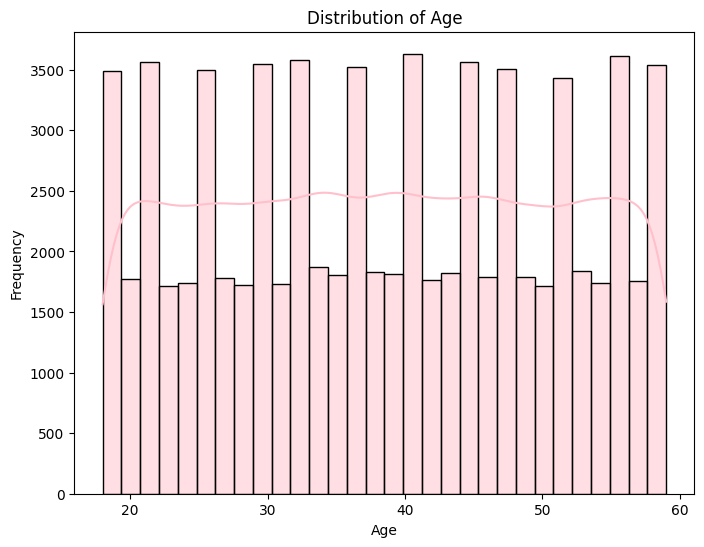

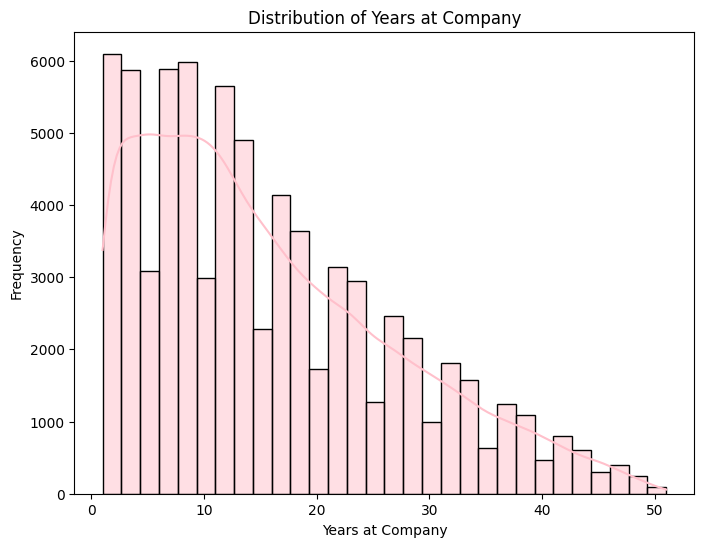

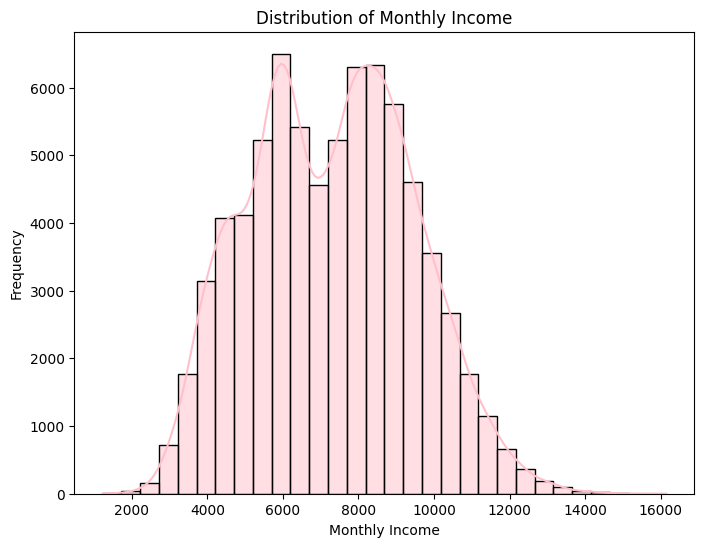

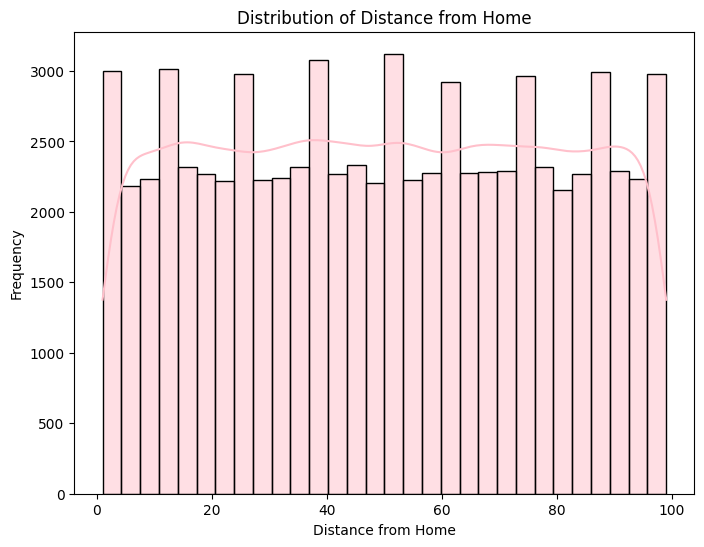

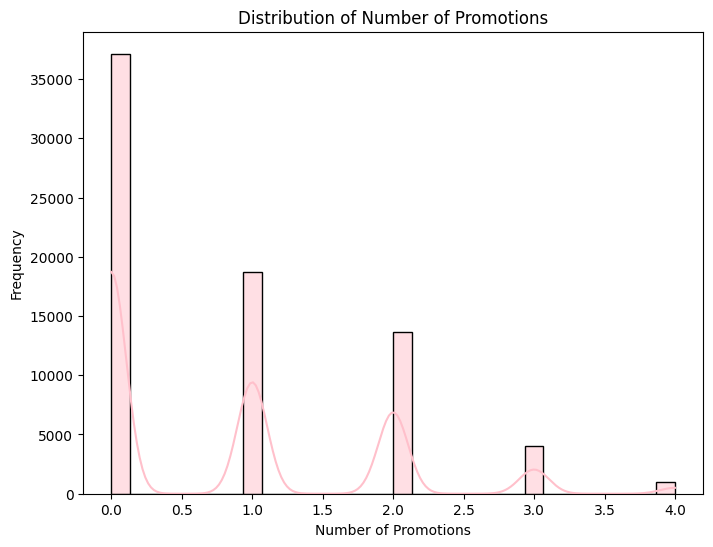

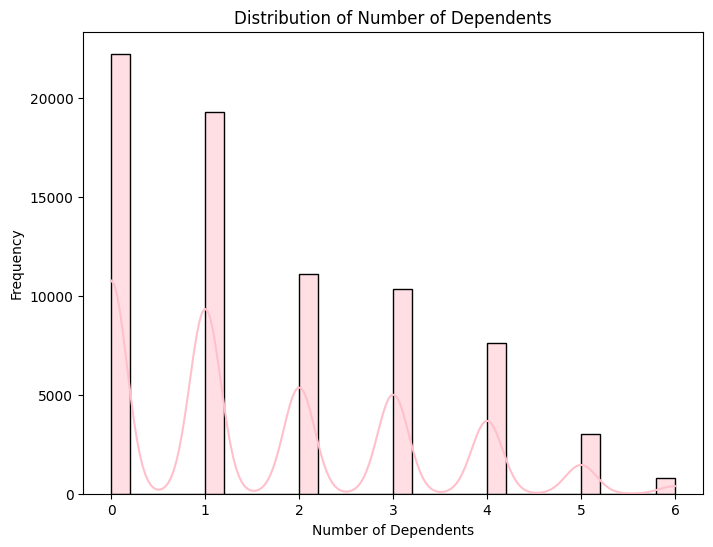

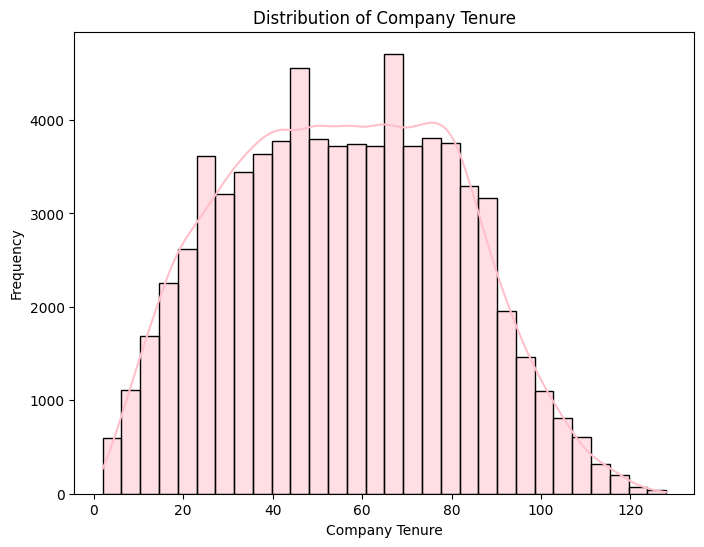

In [11]:
#histogram for  numerical cols
numerical_cols = ['Age', 'Years at Company', 'Monthly Income', 'Distance from Home', 'Number of Promotions', 'Number of Dependents', 'Company Tenure']
for feature in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature].dropna(), kde=True, bins=30, color='pink')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

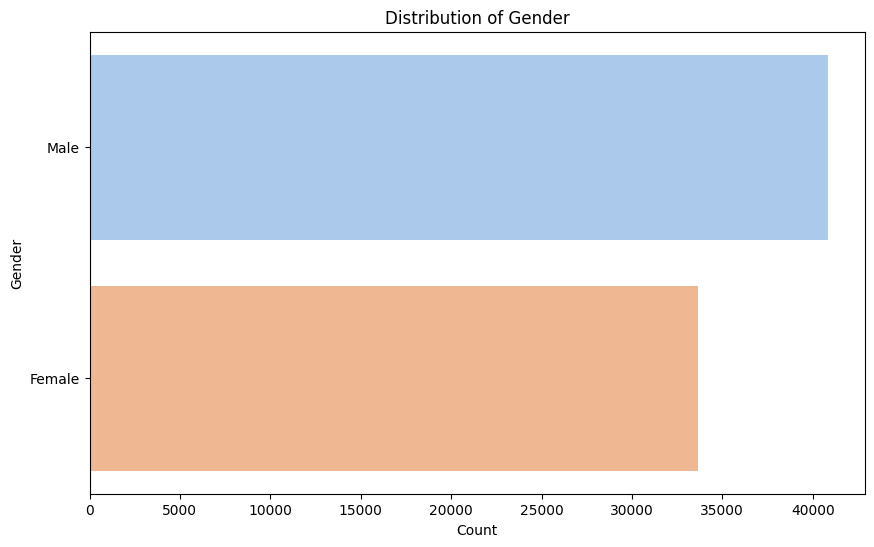

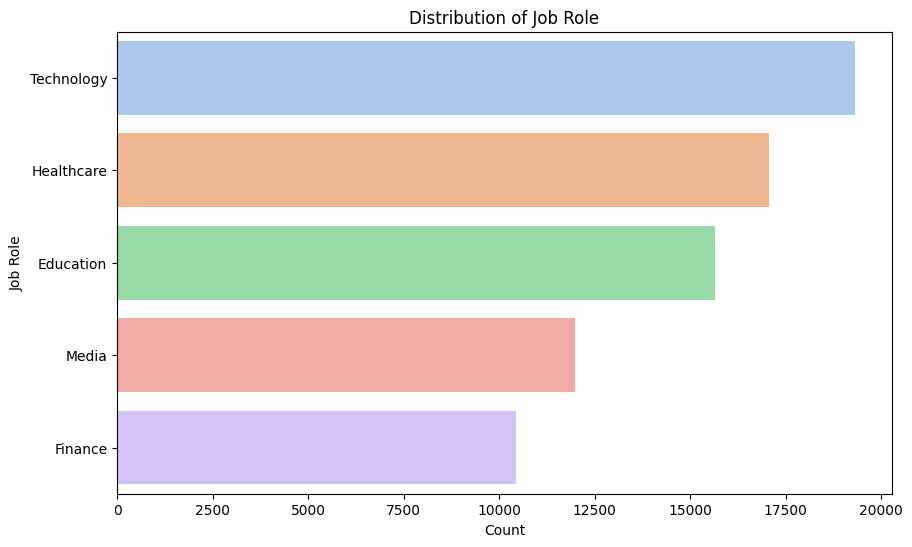

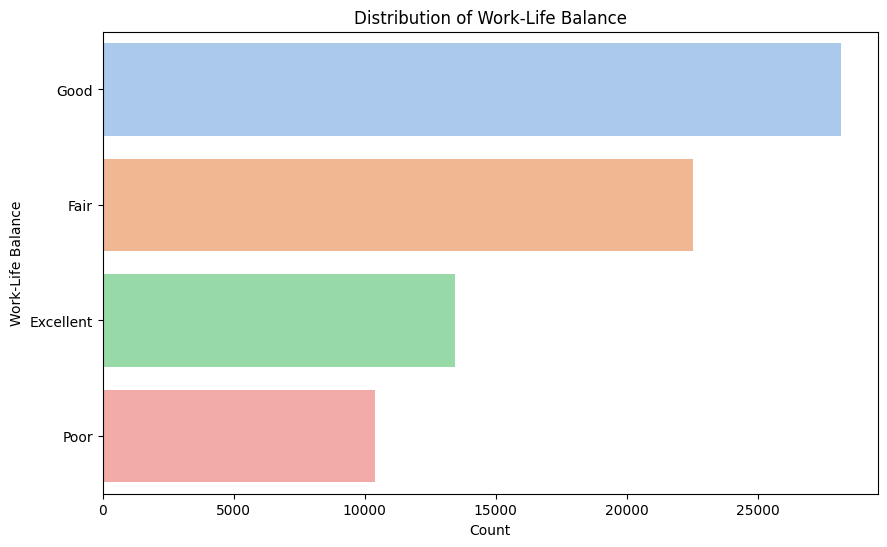

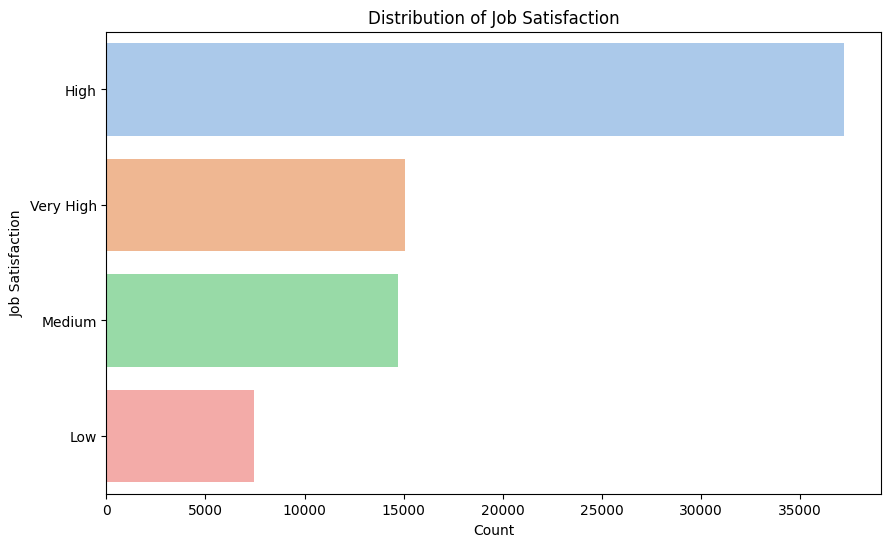

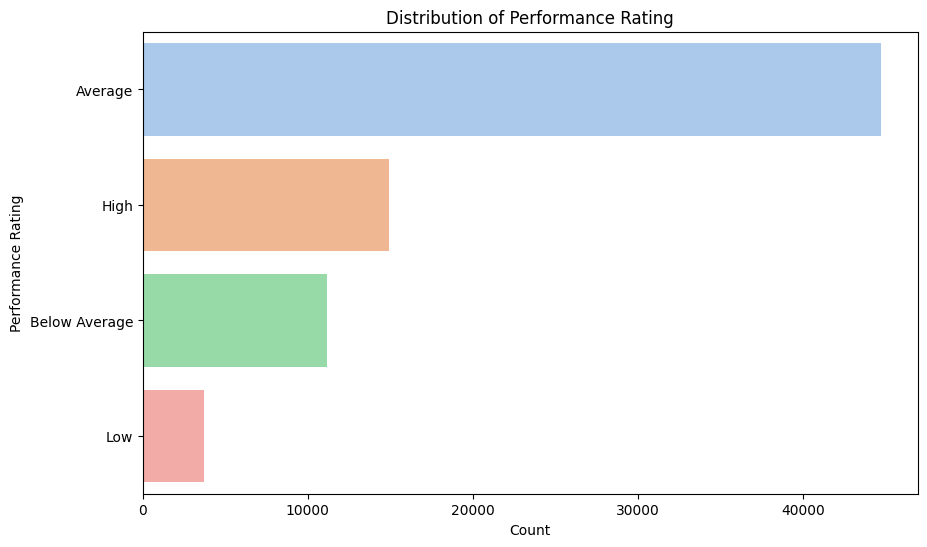

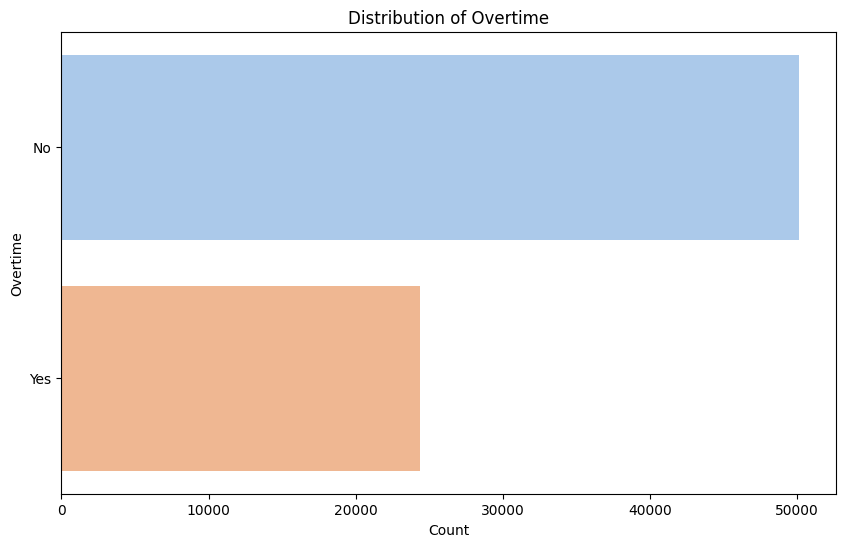

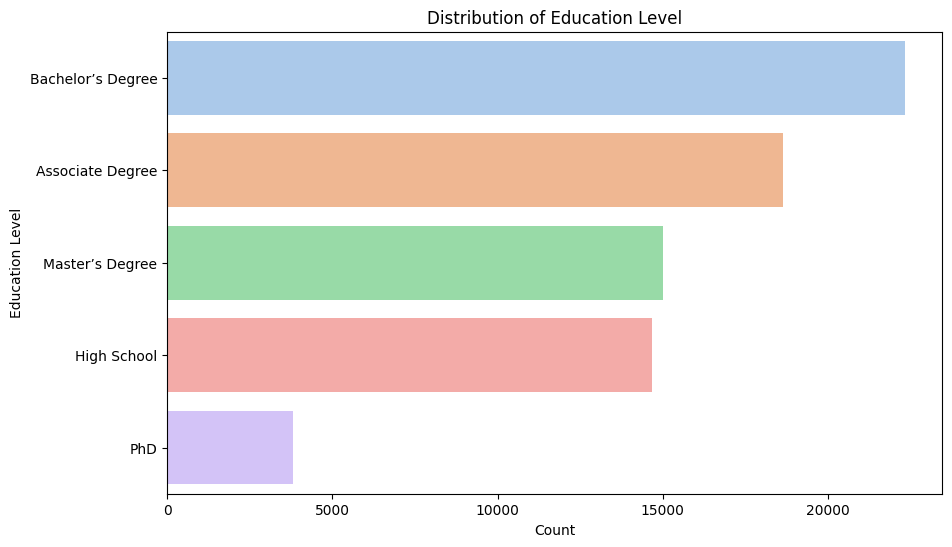

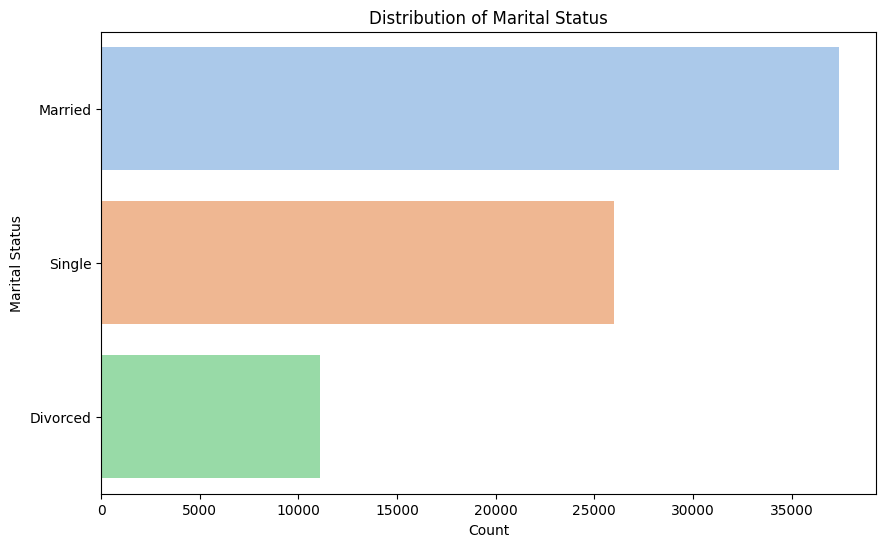

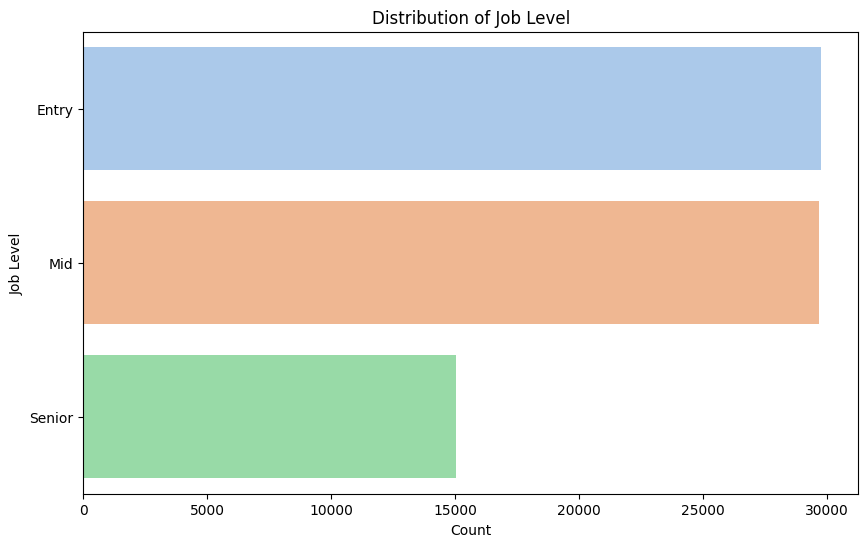

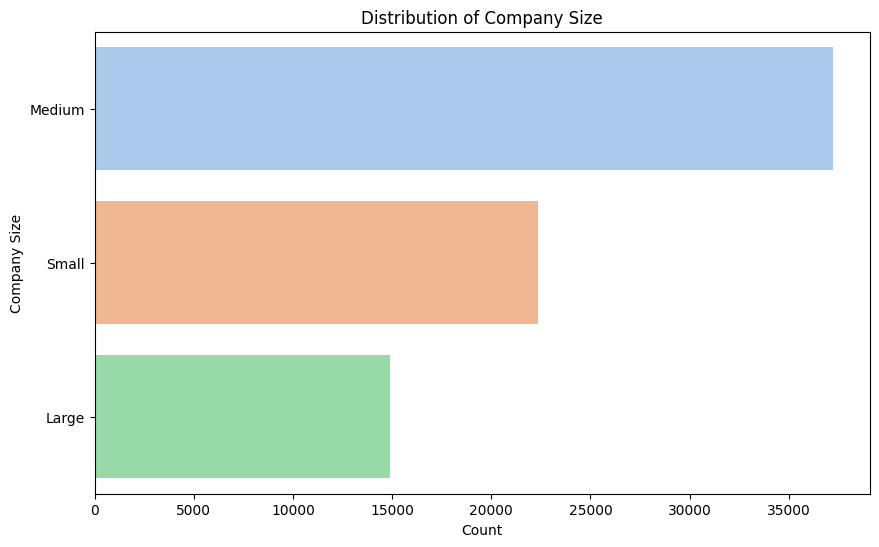

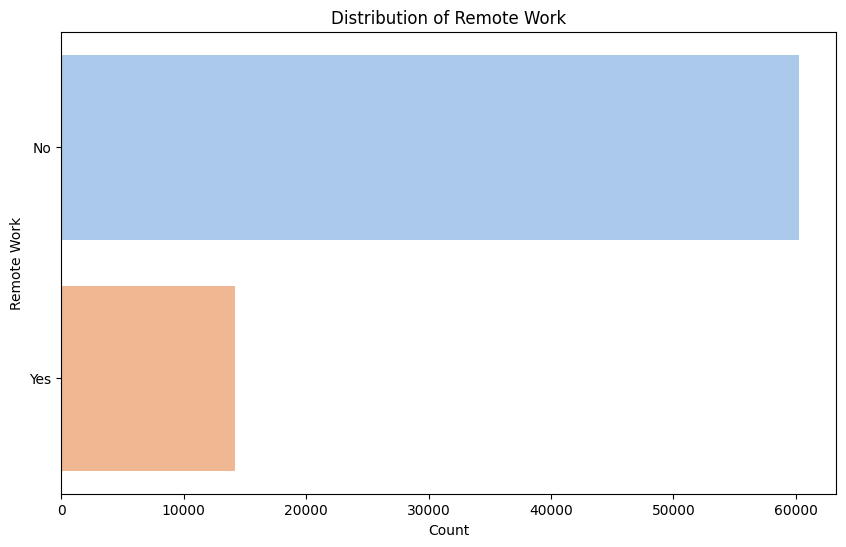

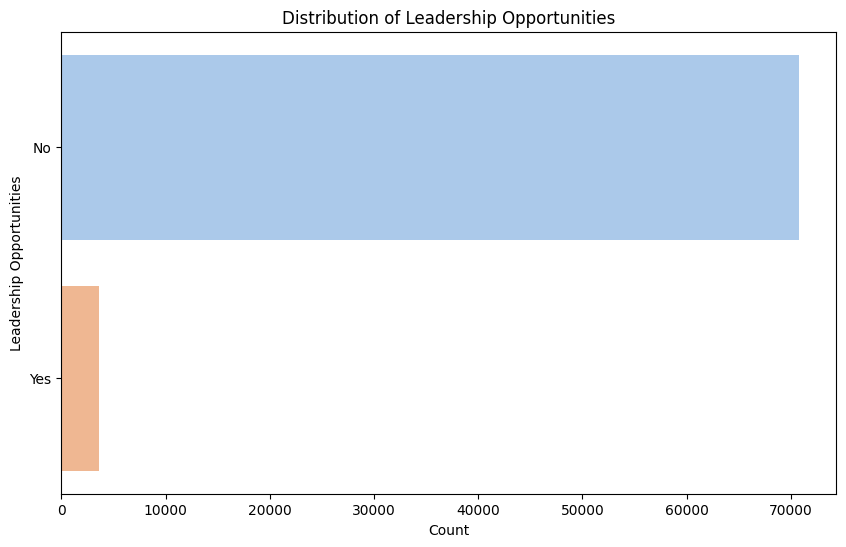

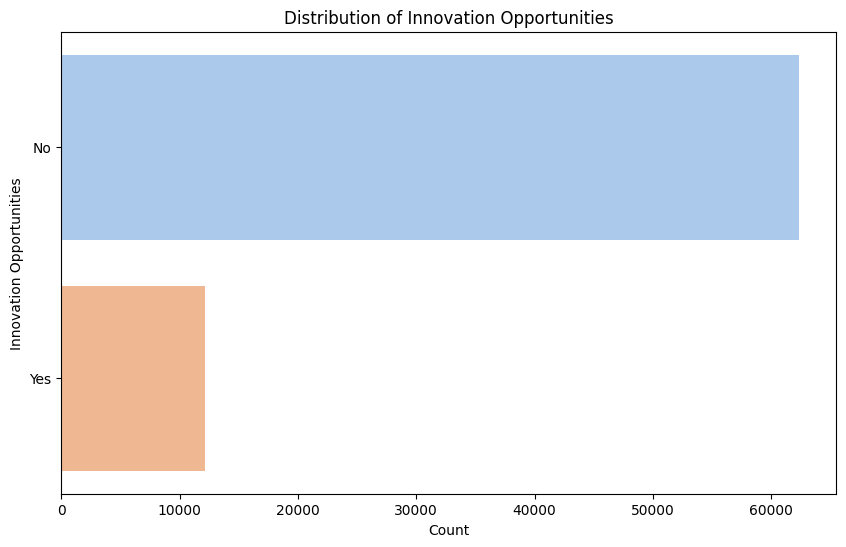

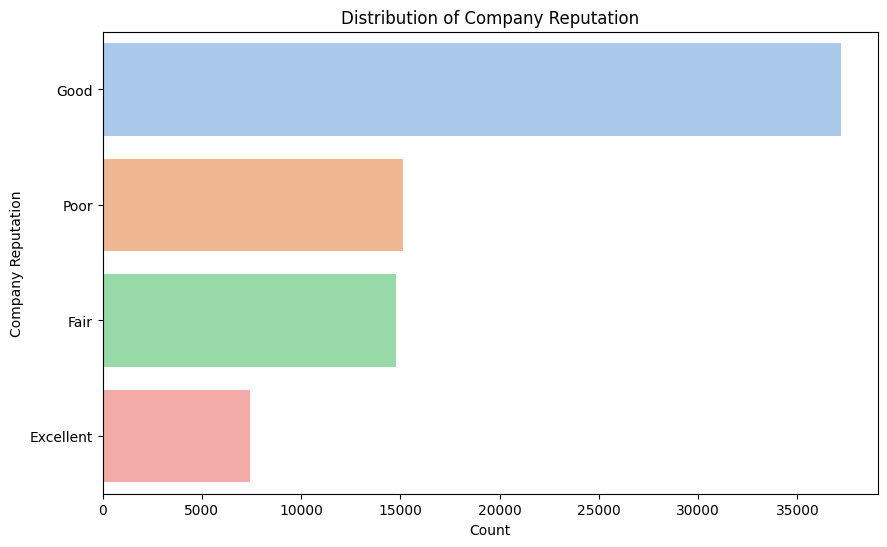

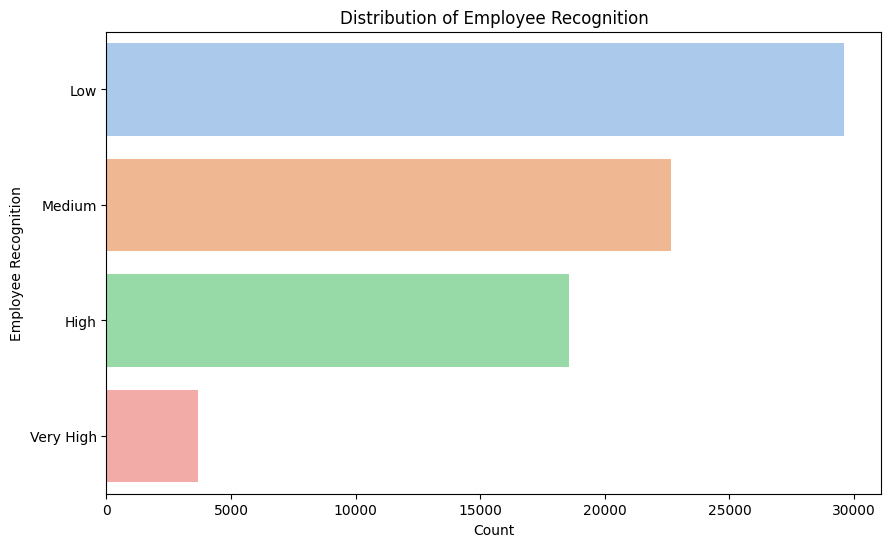

In [ ]:
#to plot distribution for categorical cols
categorical_cols = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']
for feature in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=feature, data=data, palette='pastel', order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

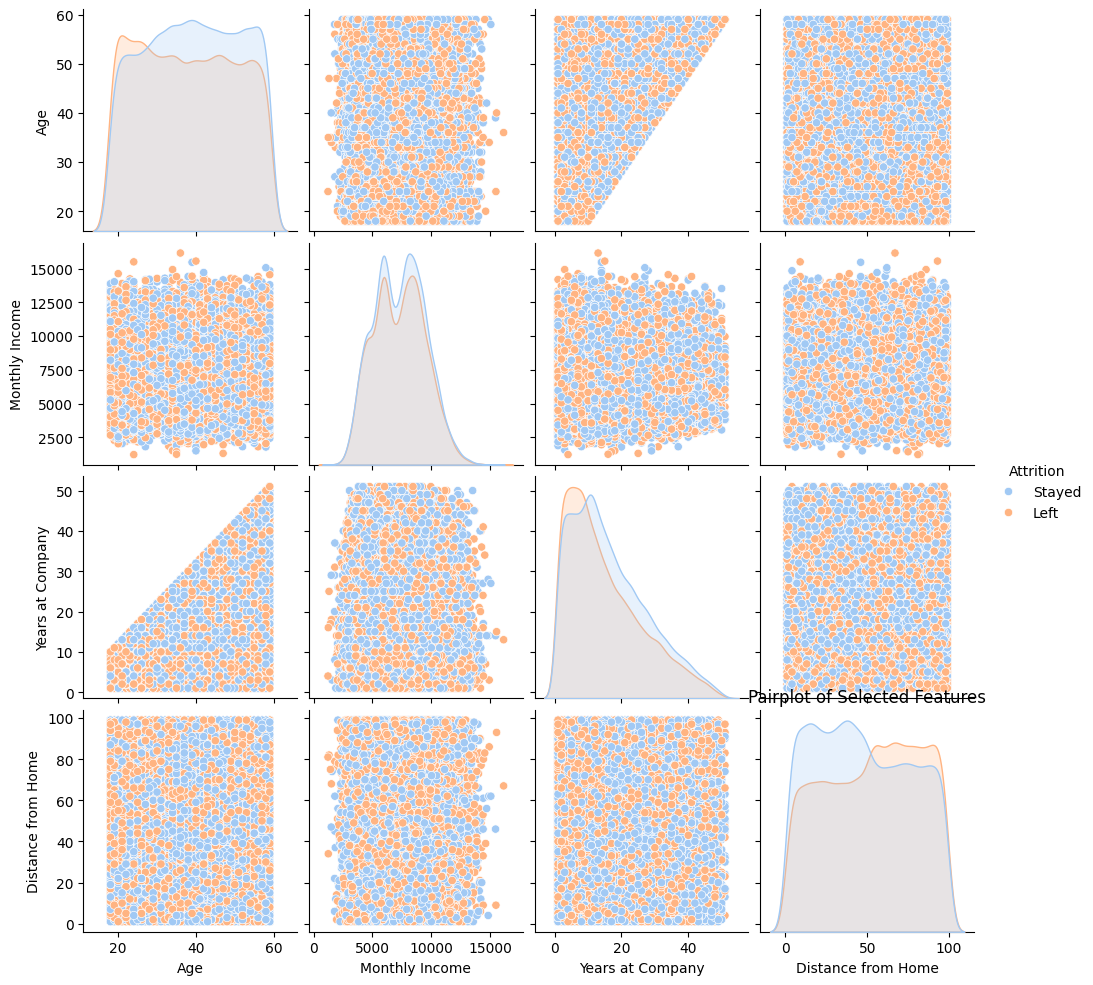

In [ ]:
# to plot pairplot of Selected cols
selected_cols = ['Age', 'Monthly Income', 'Years at Company', 'Distance from Home', 'Attrition']
sns.pairplot(data[selected_cols], hue='Attrition', palette='pastel')
plt.title('Pairplot of Selected Features')
plt.show()

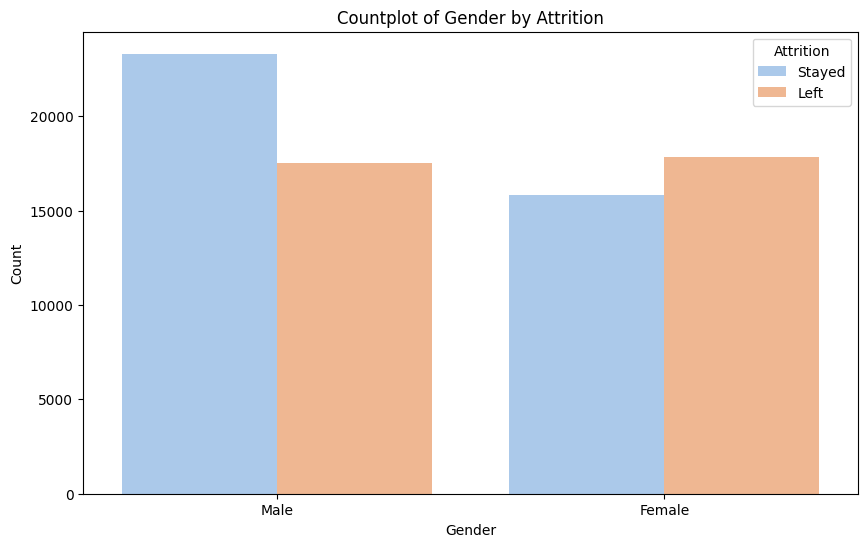

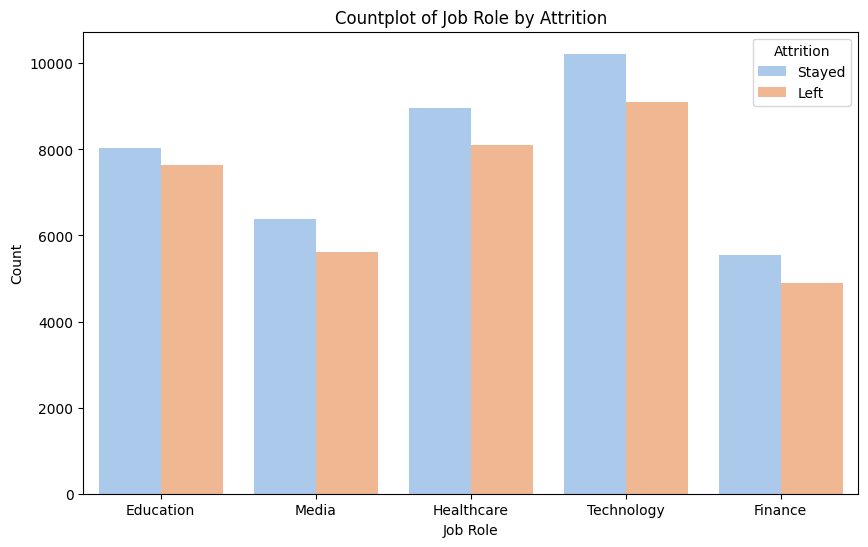

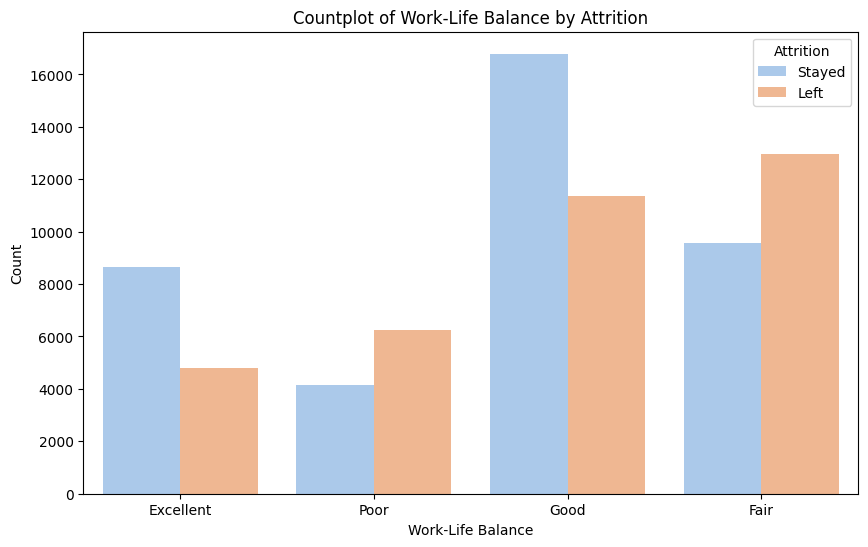

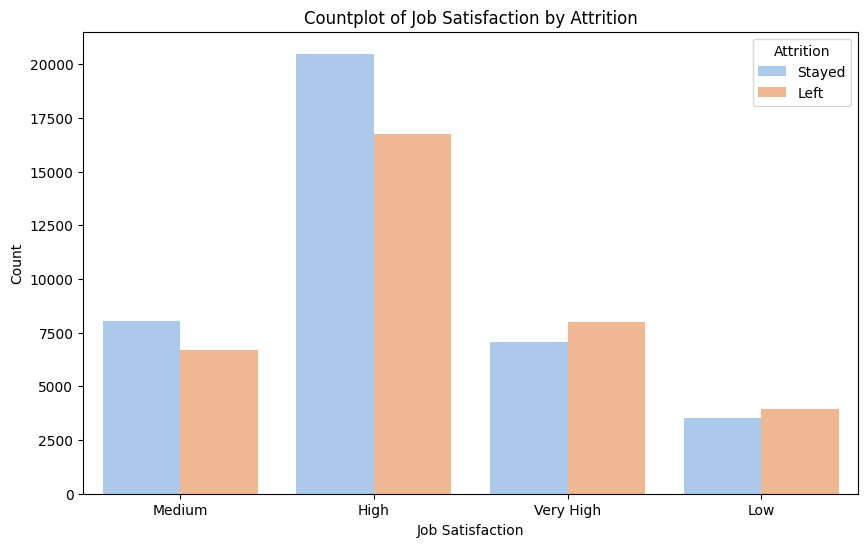

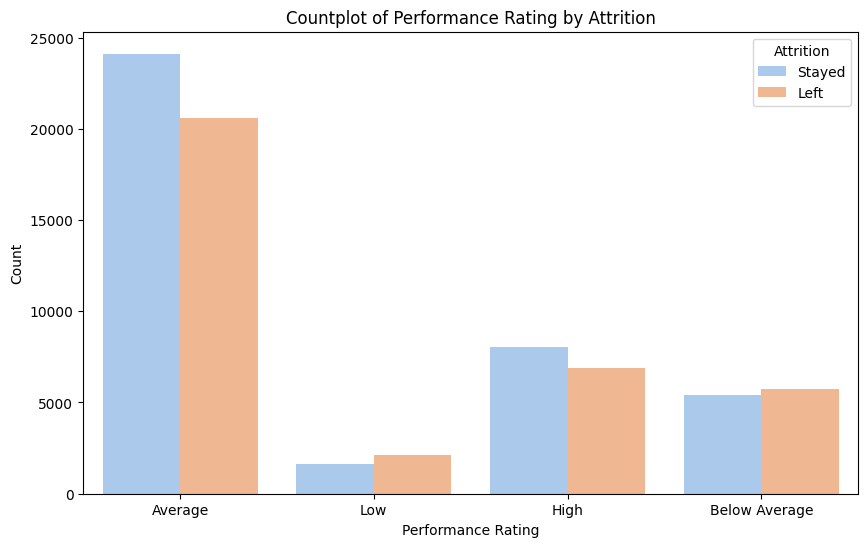

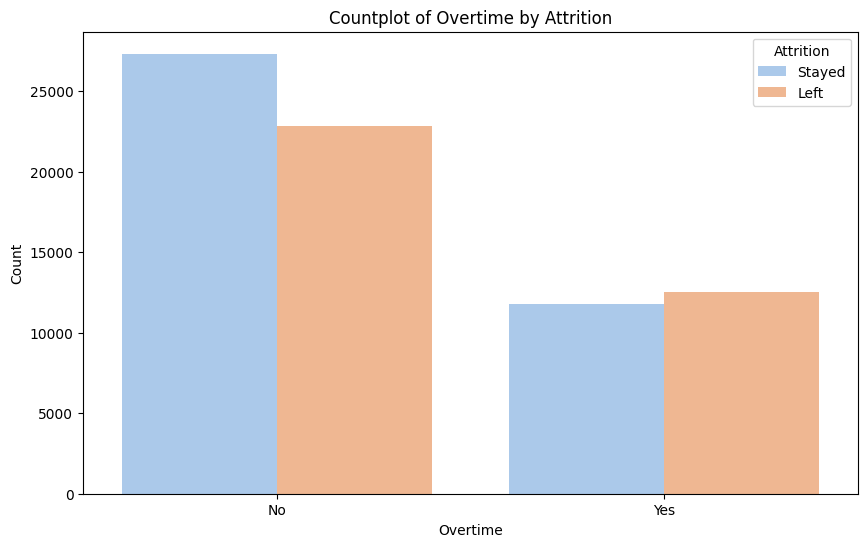

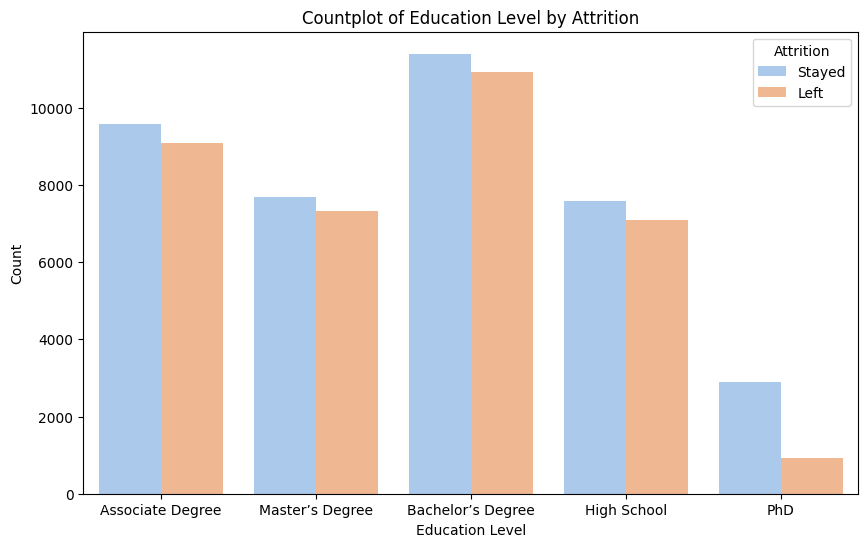

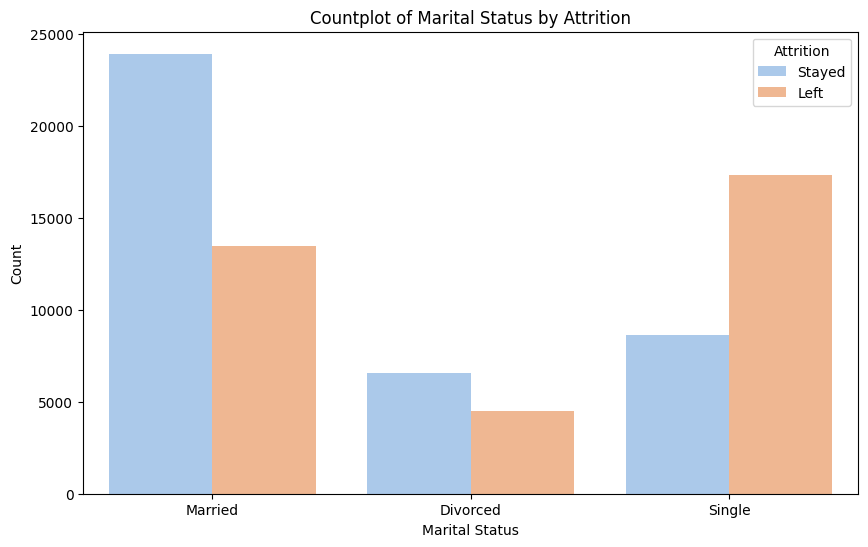

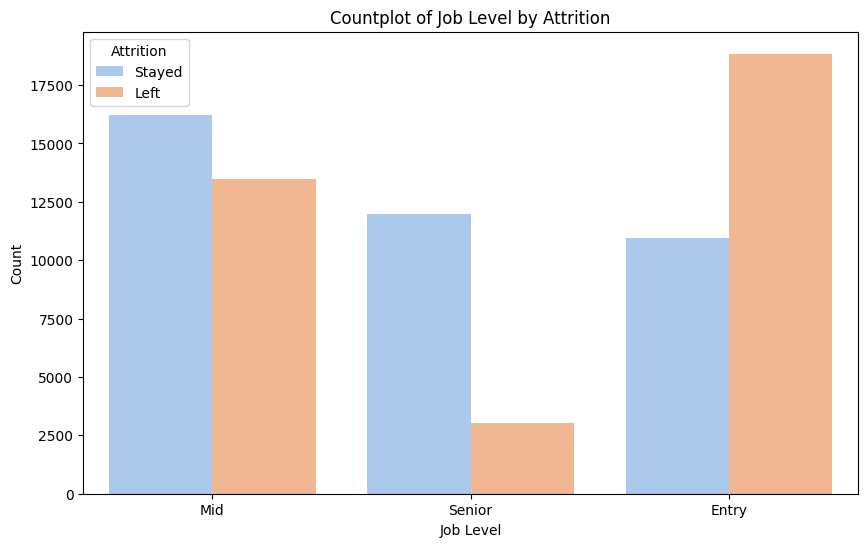

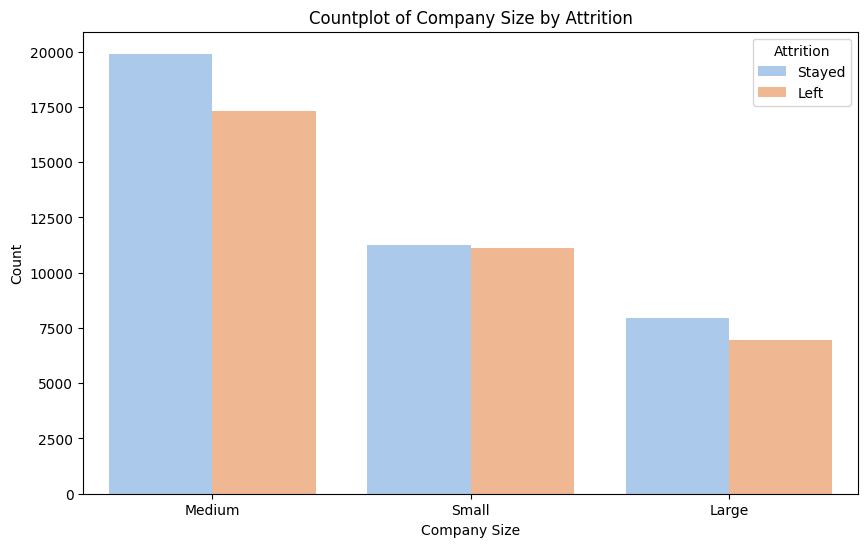

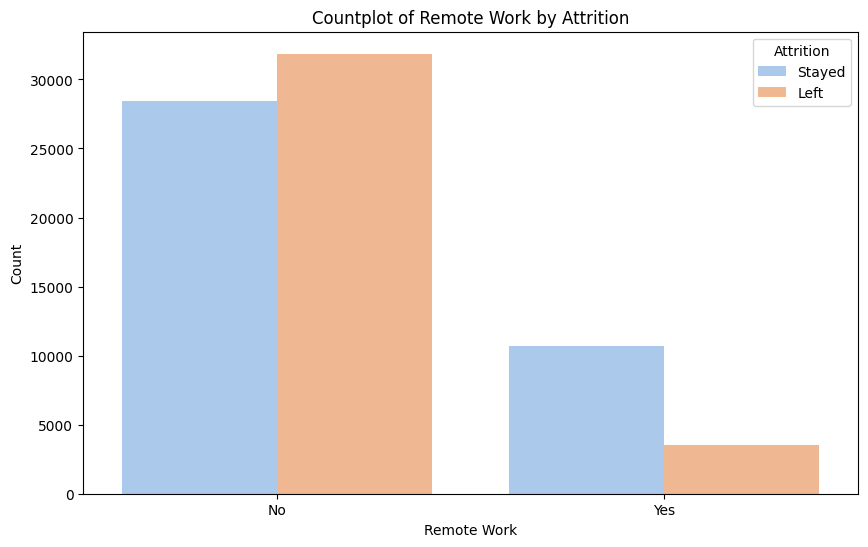

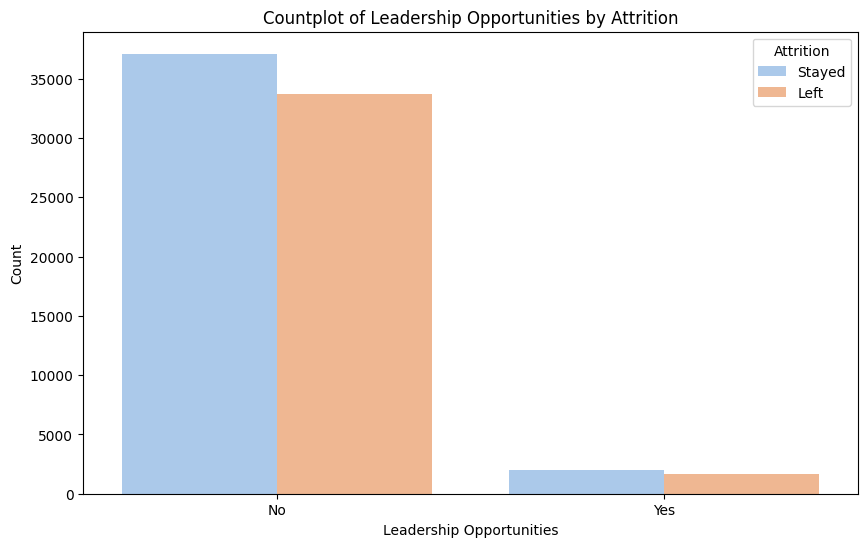

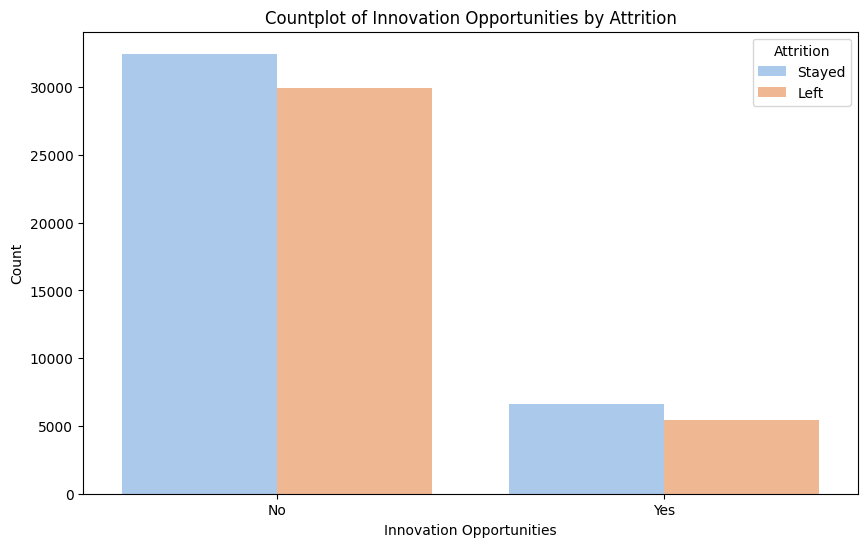

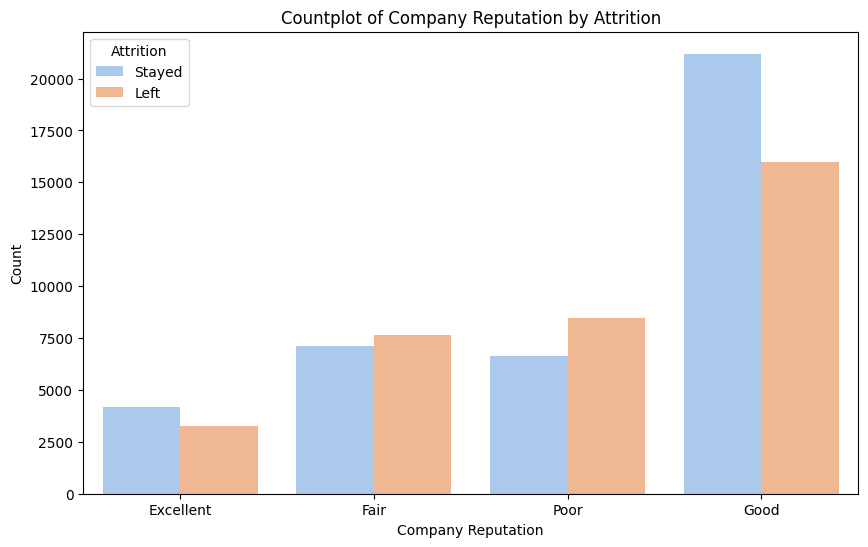

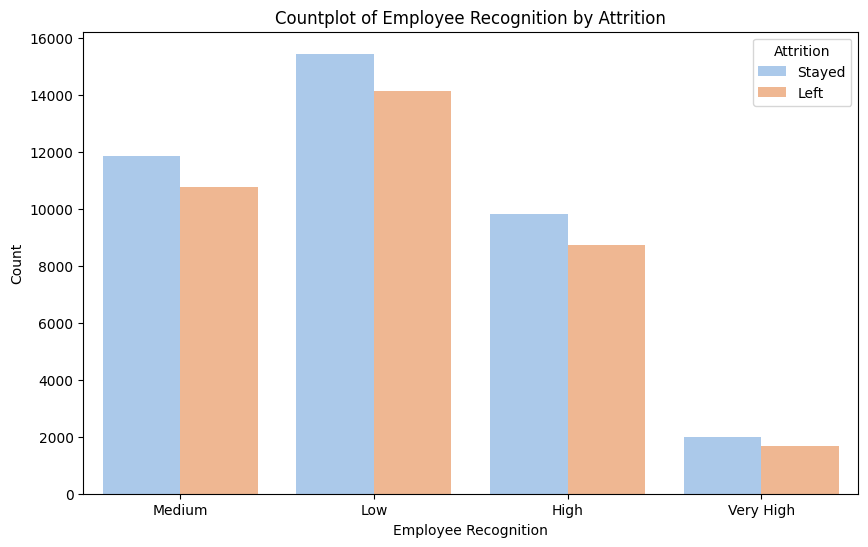

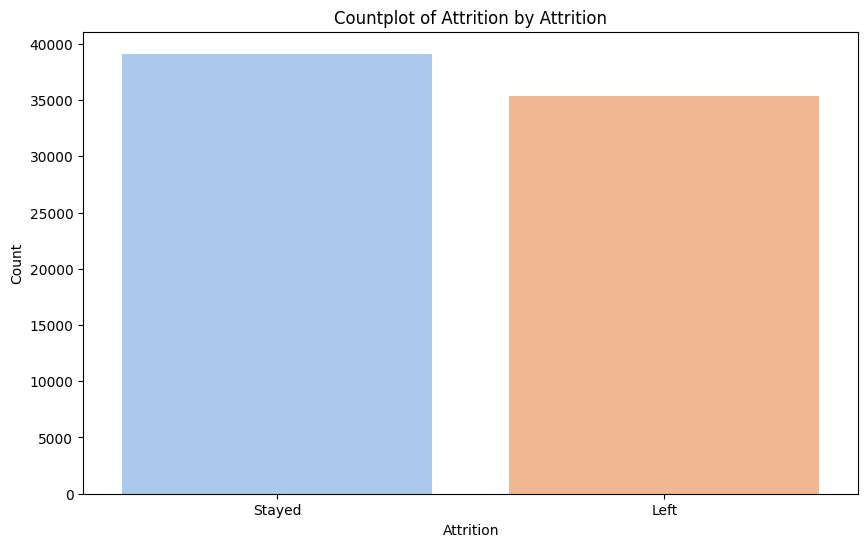

In [91]:
# to plot barplots for Categorical Features Grouped vs Attrition
for feature in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Attrition', data=data, palette='pastel')
    plt.title(f'Countplot of {feature} by Attrition')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

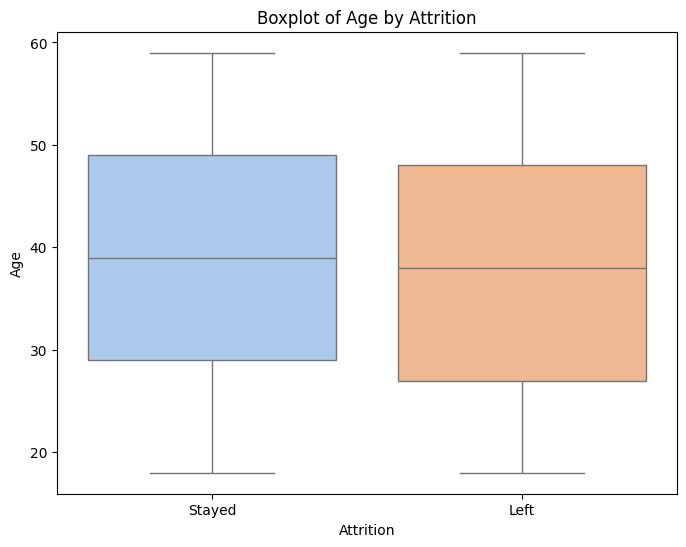

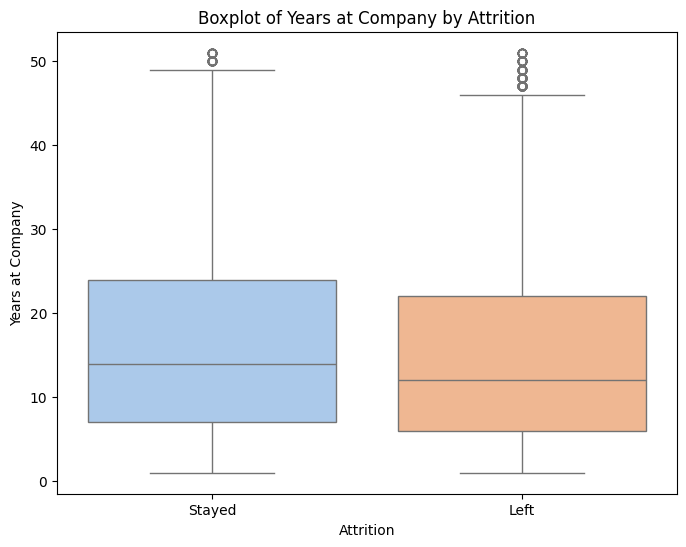

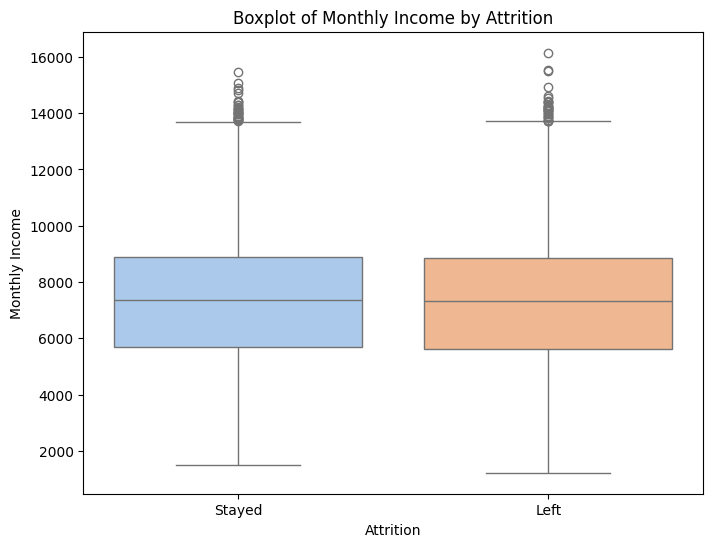

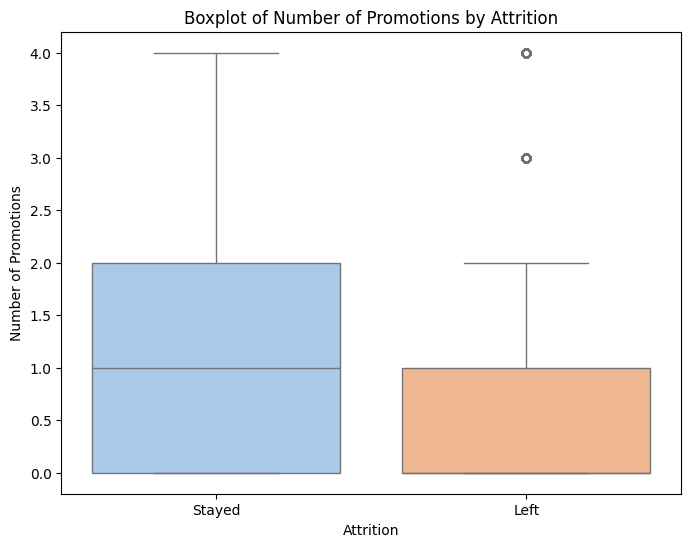

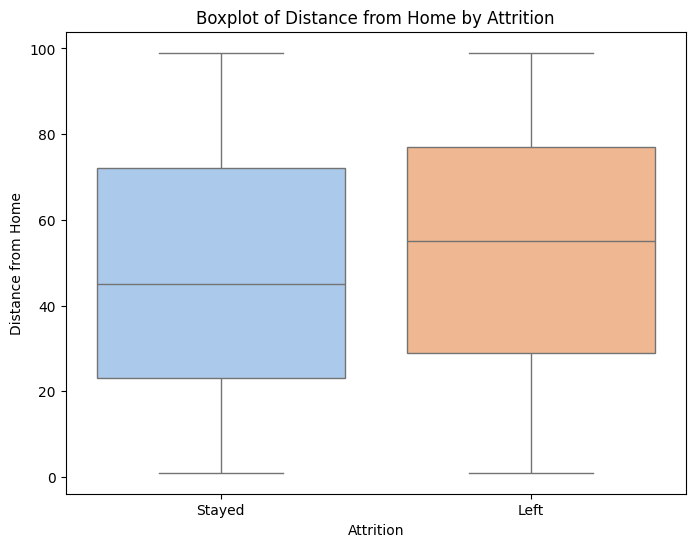

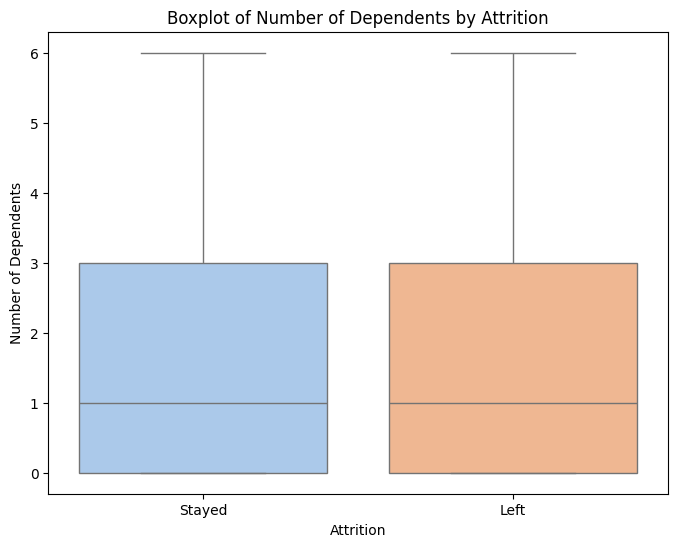

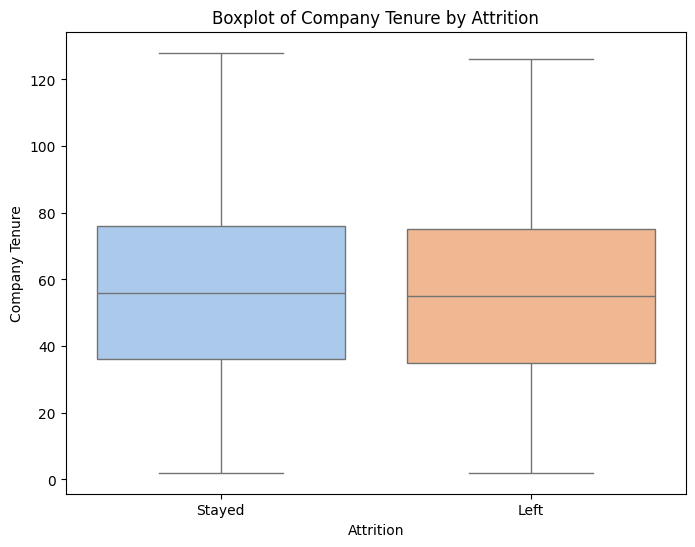

In [90]:
# Boxplots for Numerical Features vs Attrition
for feature in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Attrition', y=feature, data=data, palette='pastel')
    plt.title(f'Boxplot of {feature} by Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(feature)
    plt.show()







**Data Preprocessing**

In [10]:
data.isna().sum() #to print missing valuescount

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [11]:
missing_values = data.isnull().sum()# to print missing value percentage
missing_percentage = (missing_values / len(data)) * 100
print(missing_percentage.sort_values(ascending = False))

Number of Dependents        0.008054
Education Level             0.006712
Job Level                   0.006712
Number of Promotions        0.006712
Work-Life Balance           0.005369
Performance Rating          0.005369
Marital Status              0.005369
Remote Work                 0.004027
Employee Recognition        0.002685
Company Size                0.002685
Company Reputation          0.000000
Innovation Opportunities    0.000000
Leadership Opportunities    0.000000
Company Tenure              0.000000
Age                         0.000000
Gender                      0.000000
Distance from Home          0.000000
Overtime                    0.000000
Job Satisfaction            0.000000
Monthly Income              0.000000
Job Role                    0.000000
Years at Company            0.000000
Attrition                   0.000000
dtype: float64


In [94]:

# to calculate skewness for each numerical column
skewness = data[numerical_cols].skew()

# Print skewness for each numerical column
print("Skewness of Numerical Columns:")
for col, skew in skewness.items():
    print(f"{col}: {skew:.2f}")


Skewness of Numerical Columns:
Age: -0.00
Years at Company: 0.79
Monthly Income: 0.12
Number of Promotions: 0.99
Distance from Home: 0.00
Number of Dependents: 0.71
Company Tenure: 0.07


In [12]:
 data.dropna(inplace=True)#decided to drop since very less percentageof missing values

In [13]:
data.isnull().sum() #to print missing valuescount after imputing

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [14]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# List continuous columns
print("Continuous Columns:")
print(numerical_columns)

Continuous Columns:
Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure'],
      dtype='object')


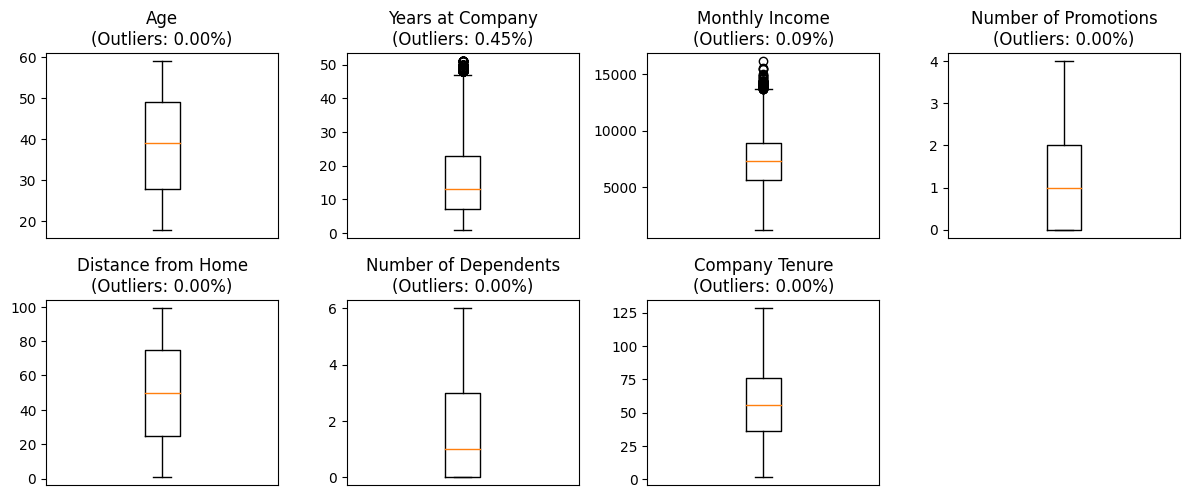

In [98]:
# List of continuous columns
continuous_columns = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure']

# Calculate outlier percentage for each column
outlier_percentages = {}
for col in continuous_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = ((data[col] < lower_bound) | (data[col] > upper_bound)).mean() * 100
    outlier_percentages[col] = outliers_percentage

# Create subplots for each continuous column
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_columns, start=1):
    plt.subplot(4, 4, i)
    plt.boxplot(data[col])
    plt.title(f'{col}\n(Outliers: {outlier_percentages[col]:.2f}%)')
    plt.xticks([])

plt.tight_layout()
plt.show()

outlier are nill  or very minute so didn't treated them

In [15]:
from sklearn.preprocessing import LabelEncoder
# Ordinal columns for label encoding
ordinal_columns = ['Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
                   'Education Level', 'Job Level', 'Marital Status',
                   'Company Size']

# Nominal columns for one-hot encoding
nominal_columns = ['Gender', 'Job Role', 'Overtime', 'Remote Work',
                   'Leadership Opportunities', 'Innovation Opportunities',
                   'Company Reputation', 'Employee Recognition']

# Apply label encoding to ordinal columns
label_encoder = LabelEncoder()
for col in ordinal_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col].astype(str))

# Apply one-hot encoding to nominal columns
data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

In [16]:
data.head()

,Age,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Marital Status,...,Overtime_Yes,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
0,31,19,5390,0,2,0,2.0,22,0,1,...,False,False,False,False,False,False,False,False,True,False
1,59,4,5534,3,0,3,3.0,21,3,0,...,False,False,False,False,True,False,False,True,False,False
2,24,10,8159,2,0,3,0.0,11,1,1,...,False,False,False,False,False,False,True,True,False,False
3,36,7,3989,2,0,2,1.0,27,2,2,...,False,True,False,False,False,True,False,False,True,False
4,56,41,4821,1,3,0,0.0,71,2,0,...,True,False,False,False,True,False,False,False,True,False


In [17]:
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition']) #target col

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74461 entries, 0 to 74497
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             74461 non-null  int64  
 1   Years at Company                74461 non-null  int64  
 2   Monthly Income                  74461 non-null  int64  
 3   Work-Life Balance               74461 non-null  int64  
 4   Job Satisfaction                74461 non-null  int64  
 5   Performance Rating              74461 non-null  int64  
 6   Number of Promotions            74461 non-null  float64
 7   Distance from Home              74461 non-null  int64  
 8   Education Level                 74461 non-null  int64  
 9   Marital Status                  74461 non-null  int64  
 10  Number of Dependents            74461 non-null  float64
 11  Job Level                       74461 non-null  int64  
 12  Company Size                    74461

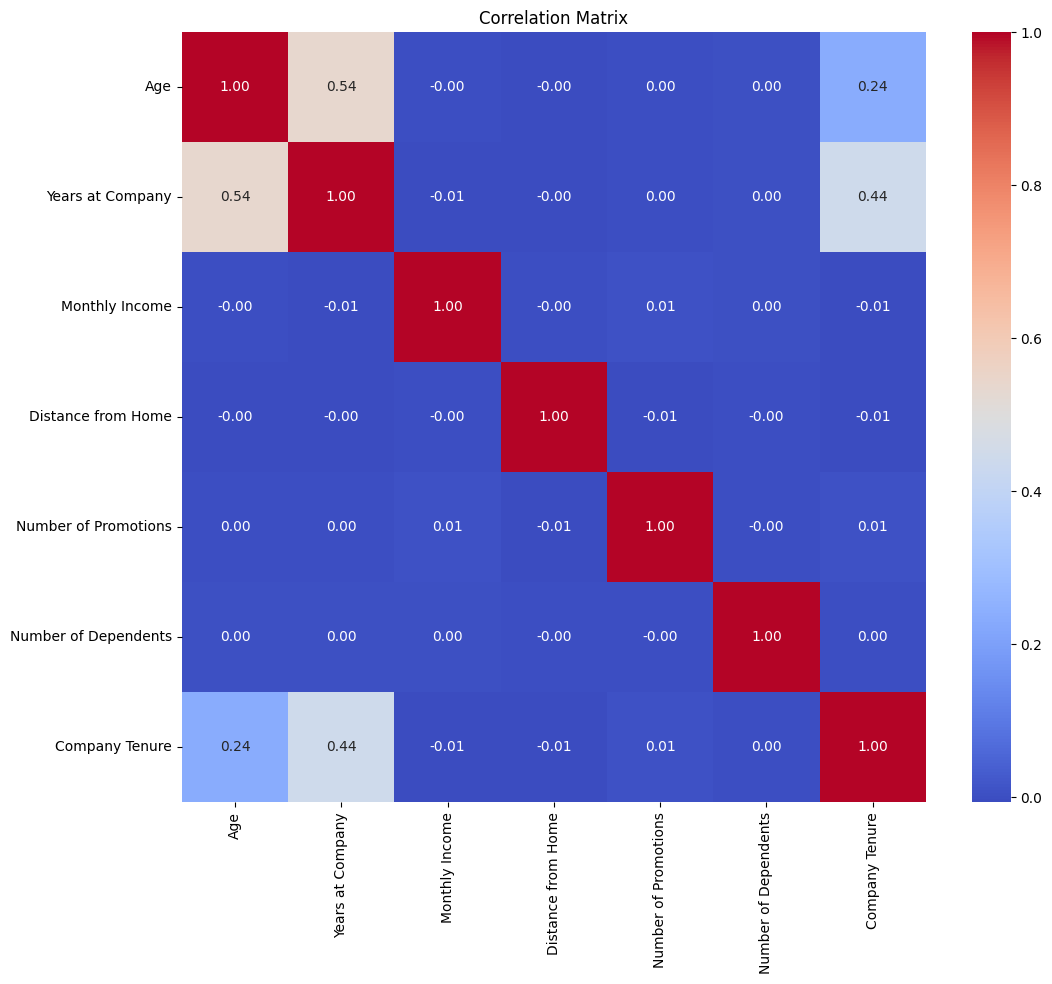

In [25]:
# Select only numeric columns for correlation matrix
numeric_data = data[numerical_cols]

# Create correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

nothing morethan correlation threshold so not need to remove cols

**Split Data**

In [19]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your original DataFrame before scaling or preprocessing

# Define features (X) and target (y)
X = data.drop('Attrition', axis=1)  # Features
y = data['Attrition']               # Target variable

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (59568, 29)
X_test shape: (14893, 29)
y_train shape: (59568,)
y_test shape: (14893,)


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier


# Create the RFECV object with a RandomForestClassifier
estimator = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=estimator, step=1, cv=5, scoring='accuracy')

# Fit RFECV
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected features: ", selected_features)

# Transform the training and testing data using the selected features
X_train = rfecv.transform(X_train)
X_test= rfecv.transform(X_test)


**Model Building**

opted for models that doesn't require scaling

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
# Encode 'Attrition' column into 0 and 1
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Use transform for test set

In [29]:

# Create a RandomForestClassifier with default parameters
rf_default = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_default.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_default = rf_default.predict(X_test)

# Calculate the accuracy score
accuracy_default_rf = accuracy_score(y_test, y_pred_default)
print("Accuracy Score without hyperparameter tuning:", accuracy_default_rf)

Accuracy Score without hyperparameter tuning: 0.7407506882427987


In [22]:
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_clf.predict(X_test)

# Calculate the accuracy score
accuracy_gb = accuracy_score(y_test, y_pred)
print("Accuracy Score for Gradient Boosting (without tuning):", accuracy_gb)

Accuracy Score for Gradient Boosting (without tuning): 0.7540455247431679


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_clf.predict(X_test)

# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy Score for Decision Tree (without tuning):", accuracy_dt)

Accuracy Score for Decision Tree (without tuning): 0.6584301349627342


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Fit the model on the training data
nb_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_clf.predict(X_test)

# Calculate the accuracy score
accuracy_nb = accuracy_score(y_test, y_pred)
print("Accuracy Score for Gaussian Naive Bayes (without tuning):", accuracy_nb)


Accuracy Score for Gaussian Naive Bayes (without tuning): 0.7134895588531525


In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Create a base decision tree classifier
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost classifier
ada_clf = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, learning_rate=1.0, random_state=42)

# Fit AdaBoost classifier on the training data
ada_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score for AdaBoost: {accuracy}")


Accuracy Score for AdaBoost: 0.7615658362989324


**After hyper parameter tuning**

went for randomsearch to reduce complexity and timesaving.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

# Define the parameter distributions for AdaBoost
param_dist = {
    'n_estimators': randint(50, 200),       # Range for number of estimators
    'learning_rate': uniform(0.01, 1.0)     # Range for learning rate
}

# Create an AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=ada, param_distributions=param_dist, n_iter=30, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_ada = random_search.best_estimator_

# Make predictions on the testing data
y_pred = best_ada.predict(X_test)

# Calculate the accuracy score
accuracy_ada = accuracy_score(y_test, y_pred)
print("Accuracy Score after hyperparameter tuning with RandomizedSearchCV:", accuracy_ada)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters found by RandomizedSearchCV:")
print(random_search.best_params_)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt']
}

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Instantiate the RandomizedSearchCV object with reduced n_iter
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=30, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_rf = random_search.best_estimator_

# Make predictions on the testing data
y_pred = best_rf.predict(X_test)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy Score after hyperparameter tuning with RandomizedSearchCV:", accuracy_rf)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dt_clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_dt_clf = random_search.best_estimator_

# Make predictions on the testing data
y_pred = best_dt_clf.predict(X_test)

# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy Score after hyperparameter tuning with RandomizedSearchCV:", accuracy_dt)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters found by RandomizedSearchCV:")
print(random_search.best_params_)


Accuracy Score after hyperparameter tuning with RandomizedSearchCV: 0.7255086282145975
Best Parameters found by RandomizedSearchCV:
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 16, 'splitter': 'best'}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 150),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Create a GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_gb_clf = random_search.best_estimator_

# Make predictions on the testing data
y_pred = best_gb_clf.predict(X_test)

# Calculate the accuracy score
accuracy_gb = accuracy_score(y_test, y_pred)
print("Accuracy Score after hyperparameter tuning with RandomizedSearchCV:", accuracy_gb)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

**without tuning**

Accuracy Score without hyperparameter tuningRF: 0.7407506882427987

Accuracy Score for Decision Tree (without tuning): 0.6584301349627342

Accuracy Score for Gradient Boosting (without tuning): 0.7540455247431679

Accuracy Score for Gaussian Naive Bayes (without tuning): 0.7134895588531525

Accuracy Score for AdaBoost: 0.7615658362989324

**with tuning **

Accuracy Score after hyperparameter tuning with DT: 0.7255086282145975

without tuning Adaboost gave best accuracy,then gradient boosting followedby Randomforest